<a href="https://colab.research.google.com/github/salexashenko/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
df=df.drop(['Unnamed: 0'], axis=1)


Text(0, 0.5, 'Weight, pounds')

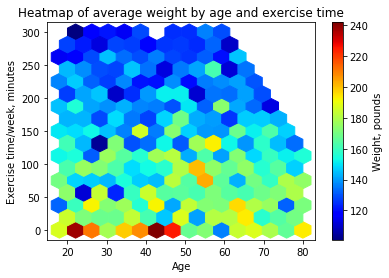

In [143]:
import pylab as pl
ax = df.plot.hexbin(x='age',
                     y='exercise_time',
                     C='weight',
                     gridsize=15,
                     cmap="jet",
              sharex=False)
ax.set_xlabel("Age")
ax.set_ylabel("Exercise time/week, minutes")
pl.title("Heatmap of average weight by age and exercise time")
f = plt.gcf()
cax = f.get_axes()[1]
cax.set_ylabel('Weight, pounds')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

Integers.

2.  What are the relationships between the variables?

The higher is somebody's exercise time, the lower is their weight. Also, it appears that as people go past 60, they stop exercising a lot.

Finally, there is something interesting happening with weight of people who exercise very little around age 50. It drops significantly.

3.  Which relationships are "real", and which spurious?

I think that the exercise/weight relationship is real, as is the drop-off in exercise time in older people.

However, the drop in the weight of people who don't exercise around age 50 is inconsistent with my life experience. My best guess is that high-weight people who don't exercise die earlier, thus dropping the average. We can check that with the following chart.

Text(0.5, 1.0, "Age distribution of high-weight people who don't exercise much")

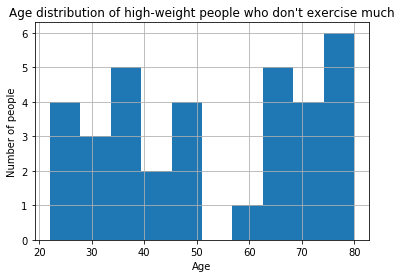

In [144]:
#age_bins = pd.cut(df['age'], 10)  # 10 equal-sized bins
#weight_bins = pd.cut(df['weight'], 10)  
#exercise_bins = pd.cut(df['exercise_time'], 15)

df2=df.loc[(df['exercise_time'] <= 20) & (df['weight'] >= 200)]
ax=df2.age.hist()
ax.set_xlabel("Age")
ax.set_ylabel("Number of people")
pl.title("Age distribution of high-weight people who don't exercise much")




In this chart it does appear that there is a drop-off in high-weight people right after 50. Is it possible that high-weight people who don't exercise die earlier, and the right side of the chart is mostly made up of people who gain weight later in life? Yes, it's certainly possible, but the sample size seems too low to make a conclusive determination on this point.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

In [0]:
from google.colab import files
uploaded = files.upload()



Saving data.csv to data.csv


,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Pet_money,3.970000e+01,4.190000e+01,4.460000e+01,4.680000e+01,4.980000e+01,5.310000e+01,5.690000e+01,6.180000e+01,6.570000e+01,6.710000e+01
1,Billions of dollars (Bureau of Economic Analysis),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Skiing_revenue,1.551000e+03,1.635000e+03,1.801000e+03,1.827000e+03,1.956000e+03,1.989000e+03,2.178000e+03,2.257000e+03,2.476000e+03,2.438000e+03
3,Dollars in millions (US Census),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US_consumption,8.200140e+12,8.603030e+12,8.987730e+12,9.470100e+12,1.006530e+13,1.070980e+13,1.133370e+13,1.190530e+13,1.232870e+13,1.227280e+13


In [0]:
df_extra=pd.read_csv('data.csv')
df_extra.index = df_extra['Unnamed: 0']
df_extra=df_extra.drop(['Unnamed: 0'], axis=1)
df_extra=df_extra.drop(['Billions of dollars (Bureau of Economic Analysis)'], axis=0)
df_extra=df_extra.drop(['Dollars in millions (US Census)'], axis=0)

df_extra.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
Unnamed: 0,,,,,,,,,,
Pet_money,3.970000e+01,4.190000e+01,4.460000e+01,4.680000e+01,4.980000e+01,5.310000e+01,5.690000e+01,6.180000e+01,6.570000e+01,6.710000e+01
Skiing_revenue,1.551000e+03,1.635000e+03,1.801000e+03,1.827000e+03,1.956000e+03,1.989000e+03,2.178000e+03,2.257000e+03,2.476000e+03,2.438000e+03
US_consumption,8.200140e+12,8.603030e+12,8.987730e+12,9.470100e+12,1.006530e+13,1.070980e+13,1.133370e+13,1.190530e+13,1.232870e+13,1.227280e+13


In [0]:
df_extra=df_extra.T

Text(0.5, 1.0, 'Money spent on pets and total skiing revenue in the US')

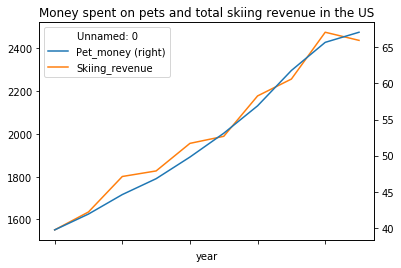

In [140]:
df_extra.index.name='year'
df_extra.plot.line(y=["Pet_money", "Skiing_revenue"] ,secondary_y='Pet_money')
pl.title("Money spent on pets and total skiing revenue in the US")


In [0]:
features = ['Pet_money','US_consumption']
target = 'Skiing_revenue'

import statsmodels.api as sm
from scipy import stats

X = df_extra[features]
y = df_extra[target]

model = sm.OLS(y, X)

results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         Skiing_revenue   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9382.
Date:                Wed, 04 Sep 2019   Prob (F-statistic):                    3.30e-14
Time:                        21:13:05   Log-Likelihood:                         -51.561
No. Observations:                  10   AIC:                                      107.1
Df Residuals:                       8   BIC:                                      107.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## Interpreting the above

I made a graph, which showed that total money spent on pets in the US is highly correlated with US skiing revenue. Then I introduced total US Final Consumption (from the World Bank) as another variable. OLS regression shows that the p-value for US Final Consumption is < 0.05, but higher than 0.05 for pet expenditures if we are trying to predict skiing revenue. Thus, it appears that Final US Consumption is a confounder for this correlation. That being said, it appears that the NIH website doesn't list this method, which may have been an oversight on my part. Let's try again.